In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv("../../Input/UK_Traffic_Accidents_2015.csv", parse_dates=[9])

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               140056 non-null  object        
 1   Location_Easting_OSGR                        140029 non-null  float64       
 2   Location_Northing_OSGR                       140029 non-null  float64       
 3   Longitude                                    140029 non-null  float64       
 4   Latitude                                     140029 non-null  float64       
 5   Police_Force                                 140056 non-null  int64         
 6   Accident_Severity                            140056 non-null  int64         
 7   Number_of_Vehicles                           140056 non-null  int64         
 8   Number_of_Casualties                         140056 non-null  in

In [4]:
#numver of missing values in every column
df.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

<AxesSubplot:>

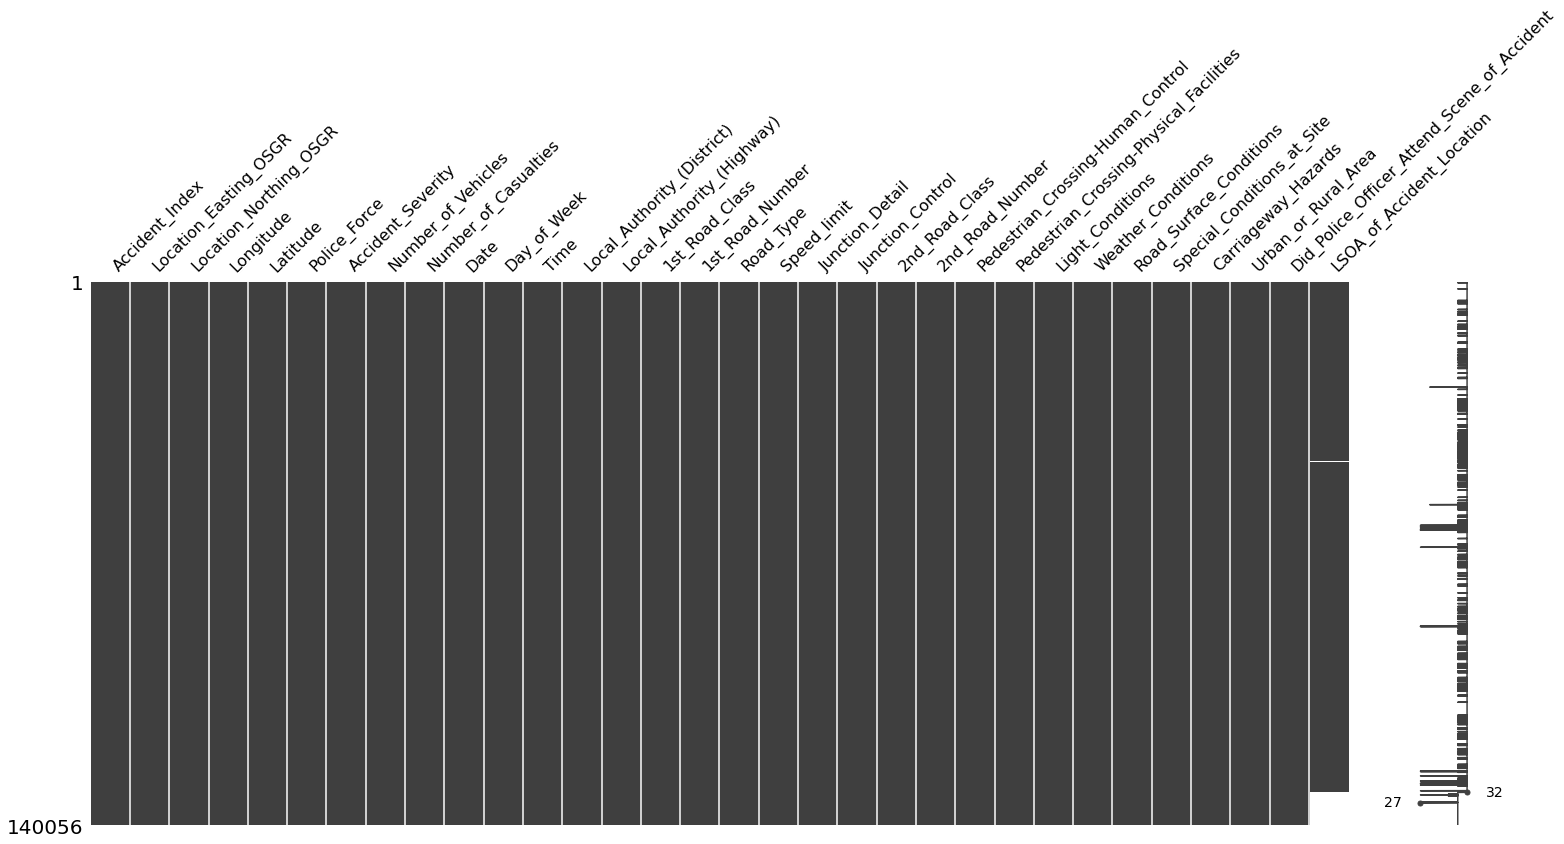

In [5]:
msno.matrix(df)

In [6]:
print("Percentage of missing values in LSOA_of_Accident_Location is {:.2f}%".format((8897 / df.shape[0]) * 100))

Percentage of missing values in LSOA_of_Accident_Location is 6.35%


Visualizing the missing values in the dataset shows most majority of the rows have data points with `LSOA_of_Acceident_Location` column having the number of missing data points which is 8897 rows, that accounts for appproximately 6.35% of the data.

<b>NB: I will advice dropping the rows with missing data since the account for very little of our dataset

### Analysis on `2nd_Road_Class` and `2nd_Road_Number` columns

In [7]:
df[["2nd_Road_Class", "2nd_Road_Number"]].head()

,2nd_Road_Class,2nd_Road_Number
0,6,0
1,3,3218
2,6,0
3,6,0
4,3,3220


In [8]:
def convert_road_class(row_value):
    """function converts road class numbers to their categorical variables"""
    road_class = {
        1: "Motorway",
        2: "A(M)",
        3: "A",
        4: "B",
        5: "C",
        6: "Unclassified"
    }
    return road_class[abs(row_value)]


In [9]:
def convert_accident_severity(row_value):
    """function converts accident severity numbers to their categorical variables"""
    severity = {
        1: "Fatal",
        2: "Serious",
        3: "Slight"
    }
    return severity[abs(row_value)]


In [10]:
df[["1st_Road_Class", "2nd_Road_Class"]] =  df[["1st_Road_Class", "2nd_Road_Class"]].applymap(convert_road_class)

In [11]:
df[["1st_Road_Class", "2nd_Road_Class"]].head()

,1st_Road_Class,2nd_Road_Class
0,C,Unclassified
1,Unclassified,A
2,B,Unclassified
3,B,Unclassified
4,A,A


In [12]:
df["Accident_Severity"] = df["Accident_Severity"].apply(convert_accident_severity)

In [13]:
df["Accident_Severity"].head()

0     Slight
1     Slight
2     Slight
3     Slight
4    Serious
Name: Accident_Severity, dtype: object

In [14]:
severity_by_road_class = df[["2nd_Road_Class", "Accident_Severity", "2nd_Road_Number"]].groupby(["Accident_Severity", "2nd_Road_Class"]).count()

In [15]:
severity_by_road_class

2nd_Road_Number
Accident_Severity 2nd_Road_Class                 
Fatal             A                            69
                  B                            34
                  C                            44
                  Motorway                   1054
                  Unclassified                415
Serious           A                          1347
                  A(M)                          9
                  B                           674
                  C                           725
                  Motorway                   9474
                  Unclassified               7809
Slight            A                         12385
                  A(M)                         87
                  B                          4918
                  C                          5222
                  Motorway                  46926
                  Unclassified              48864

In [16]:
# resetting index to give a proper dataframe for analysis
severity_by_road_class = severity_by_road_class.reset_index()

In [17]:
# renaming index to give proper naming convention to column
severity_by_road_class = severity_by_road_class.rename({
    "2nd_Road_Number": "Accident_Count"
}, axis=1)

In [18]:
severity_by_road_class

,Accident_Severity,2nd_Road_Class,Accident_Count
0,Fatal,A,69
1,Fatal,B,34
2,Fatal,C,44
3,Fatal,Motorway,1054
4,Fatal,Unclassified,415
5,Serious,A,1347
6,Serious,A(M),9
7,Serious,B,674
8,Serious,C,725
9,Serious,Motorway,9474


<AxesSubplot:xlabel='Accident_Severity', ylabel='Accident_Count'>

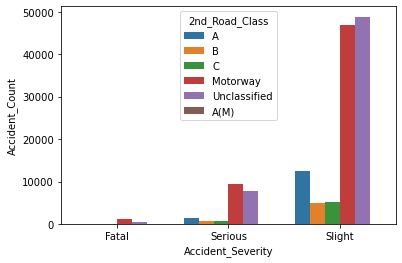

In [19]:
sns.barplot(x="Accident_Severity", y="Accident_Count", data=severity_by_road_class, hue="2nd_Road_Class")

From the chart above, we see `Motorway` and `Unclassified` roads having the highest injury counts accross all accidents severity. With `Motorway` having the highest number of fatal injuries and `Unclassified` roads having the highest number of slight injuries from accidents.